In [1]:
import numpy as np

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d karakaggle/kaggle-cat-vs-dog-dataset

kaggle-cat-vs-dog-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
from zipfile import ZipFile
dataset = '/content/kaggle-cat-vs-dog-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('Extracted')

Extracted


In [5]:
import os

Importing all the cat image file names in cat_files

In [6]:
cat_files = os.listdir('/content/kagglecatsanddogs_3367a/PetImages/Cat')

In [7]:
len(cat_files)

12491

Deleting the non-image file in cat_files

In [8]:
cat=[]
for i in cat_files:
  if i!='Thumbs.db':
    cat.append(i)

In [9]:
len(cat)

12490

Importing all the dog image files names in dog_files

In [10]:
dog_files = os.listdir('/content/kagglecatsanddogs_3367a/PetImages/Dog')

In [11]:
len(dog_files)

12470

Deleting the non-image file in dog_files

In [12]:
dog=[]
for i in dog_files:
  if i!='Thumbs.db':
    dog.append(i)

In [13]:
len(dog)

12469

Making the label for cat and dog

In [14]:
cat_label = [0]*12490
dog_label = [1]*12469

Merging both the labeling in label

In [15]:
label = cat_label+dog_label

In [16]:
from PIL import Image

Importing all the image array in the data

In [17]:
data = []

cat_path = '/content/kagglecatsanddogs_3367a/PetImages/Cat/'

for img_path in cat:
  image = Image.open(cat_path+img_path)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

dog_path = '/content/kagglecatsanddogs_3367a/PetImages/Dog/'

for img_path in dog:
  image = Image.open(dog_path+img_path)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


In [18]:
from google.colab.patches import cv2_imshow

In [19]:
len(data)

24959

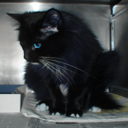

In [20]:
cv2_imshow(data[1])

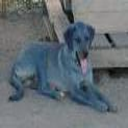

In [21]:
cv2_imshow(data[15890])

In [22]:
X = np.array(data)
y = np.array(label)

In [23]:
X.shape

(24959, 128, 128, 3)

In [24]:
y.shape

(24959,)

Doing train test split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2)

In [27]:
print(X_train.shape, X_test.shape)

(19967, 128, 128, 3) (4992, 128, 128, 3)


Slicing the data into smaller data as RAM keep crashing with more data

In [28]:
X_train_=X_train[:6000]
y_train_=y_train[:6000]
X_test_=X_test[:1000]
y_test_=y_test[:1000]

In [29]:
print(X_train_.shape, X_test_.shape)

(6000, 128, 128, 3) (1000, 128, 128, 3)


In [30]:
X_train_[0]

array([[[ 30,  27,  15],
        [ 31,  25,  15],
        [ 37,  28,  19],
        ...,
        [126, 123, 118],
        [124, 121, 116],
        [120, 119, 115]],

       [[ 30,  26,  15],
        [ 34,  28,  18],
        [ 37,  28,  19],
        ...,
        [129, 126, 121],
        [126, 123, 118],
        [121, 120, 116]],

       [[ 31,  24,  14],
        [ 35,  27,  17],
        [ 32,  24,  14],
        ...,
        [130, 127, 122],
        [127, 125, 120],
        [123, 121, 117]],

       ...,

       [[ 53,  39,  25],
        [ 67,  50,  34],
        [ 73,  52,  32],
        ...,
        [ 66,  48,  31],
        [ 62,  44,  28],
        [ 63,  42,  28]],

       [[ 62,  45,  29],
        [ 68,  50,  33],
        [ 72,  51,  32],
        ...,
        [ 65,  45,  31],
        [ 60,  40,  27],
        [ 60,  38,  27]],

       [[ 63,  46,  30],
        [ 66,  48,  31],
        [ 69,  48,  29],
        ...,
        [ 61,  42,  27],
        [ 58,  39,  26],
        [ 52,  35,  27]]

Scaling the images by dividing with 255

In [31]:
X_train_scaled, X_test_scaled = X_train_/255, X_test_/255

In [32]:
X_train_scaled[0]

array([[[0.11764706, 0.10588235, 0.05882353],
        [0.12156863, 0.09803922, 0.05882353],
        [0.14509804, 0.10980392, 0.0745098 ],
        ...,
        [0.49411765, 0.48235294, 0.4627451 ],
        [0.48627451, 0.4745098 , 0.45490196],
        [0.47058824, 0.46666667, 0.45098039]],

       [[0.11764706, 0.10196078, 0.05882353],
        [0.13333333, 0.10980392, 0.07058824],
        [0.14509804, 0.10980392, 0.0745098 ],
        ...,
        [0.50588235, 0.49411765, 0.4745098 ],
        [0.49411765, 0.48235294, 0.4627451 ],
        [0.4745098 , 0.47058824, 0.45490196]],

       [[0.12156863, 0.09411765, 0.05490196],
        [0.1372549 , 0.10588235, 0.06666667],
        [0.1254902 , 0.09411765, 0.05490196],
        ...,
        [0.50980392, 0.49803922, 0.47843137],
        [0.49803922, 0.49019608, 0.47058824],
        [0.48235294, 0.4745098 , 0.45882353]],

       ...,

       [[0.20784314, 0.15294118, 0.09803922],
        [0.2627451 , 0.19607843, 0.13333333],
        [0.28627451, 0

In [33]:
from tensorflow.keras import Sequential, layers, models
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

Making a CNN model

In [35]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128,128,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)               7

Fitting the data in the model with epochs = 7

In [37]:
model.fit(X_train_scaled, y_train_, epochs=7)

Epoch 1/7
188/188 [==============================] - 152s 796ms/step - loss: 0.7026 - accuracy: 0.5865
Epoch 2/7
188/188 [==============================] - 147s 781ms/step - loss: 0.5686 - accuracy: 0.7108
Epoch 3/7
188/188 [==============================] - 150s 798ms/step - loss: 0.4762 - accuracy: 0.7750
Epoch 4/7
188/188 [==============================] - 148s 788ms/step - loss: 0.3546 - accuracy: 0.8403
Epoch 5/7
188/188 [==============================] - 145s 772ms/step - loss: 0.2274 - accuracy: 0.9065
Epoch 6/7
188/188 [==============================] - 143s 758ms/step - loss: 0.1234 - accuracy: 0.9538
Epoch 7/7
188/188 [==============================] - 144s 767ms/step - loss: 0.0479 - accuracy: 0.9845


Exporting the model using pickle

In [38]:
import pickle
pickle.dump(model,open('1_model.pkl','wb'))

In [39]:
loss, accuracy = model.evaluate(X_test_scaled, y_test_)

32/32 [==============================] - 6s 173ms/step - loss: 1.1031 - accuracy: 0.7290


In [40]:
accuracy

0.7289999723434448

In [43]:
import cv2
from google.colab.patches import cv2_imshow

Testing the model with random images

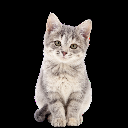

1/1 [==============================] - 0s 116ms/step
[[0.9992785  0.00207203]]
Cat


In [44]:
img_path = '17-1.png'
img = cv2.imread(img_path)
img = cv2.resize(img,(128,128))
cv2_imshow(img)
img = img/255
img = np.reshape(img,[1,128,128,3])
pred = model.predict(img)
print(pred)
pred = np.argmax(pred)
if pred==1:
  print('Dog')
else:
  print('Cat')

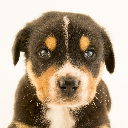

1/1 [==============================] - 0s 33ms/step
[[0.02734958 0.9928692 ]]
Dog


In [45]:
img_path = 'domestic-dog_thumb_square.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (128,128))
cv2_imshow(img)
img = img/255
img = np.reshape(img,[1,128,128,3])
pred = model.predict(img)
print(pred)
pred = np.argmax(pred)
if pred==1:
  print('Dog')
else:
  print('Cat')

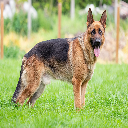

1/1 [==============================] - 0s 30ms/step
[[0.47164163 0.9215933 ]]
Dog


In [46]:
img_path = 'German-Shepherd-dog-Alsatian.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (128,128))
cv2_imshow(img)
img = img/255
img = np.reshape(img,[1,128,128,3])
pred = model.predict(img)
print(pred)
pred = np.argmax(pred)
if pred==1:
  print('Dog')
else:
  print('Cat')

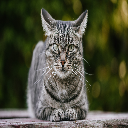

1/1 [==============================] - 0s 30ms/step
[[0.7667487  0.41986722]]
Cat


In [48]:
img_path = 'cat.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (128,128))
cv2_imshow(img)
img = img/255
img = np.reshape(img,[1,128,128,3])
pred = model.predict(img)
print(pred)
pred = np.argmax(pred)
if pred==1:
  print('Dog')
else:
  print('Cat')